<a href="https://colab.research.google.com/github/Bavalpreet/BMU_Notebooks/blob/main/ml_models/Random_Forest(regressor_and_classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Random Forest`**

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

**`How the Random Forest Algorithm Works`**

The following are the basic steps involved in performing the random forest algorithm:

1. Pick N random records from the dataset.

2. Build a decision tree based on these N records.

3. Choose the number of trees you want in your algorithm and repeat steps 1 and 2.

4. In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

**`Advantages of using Random Forest`**

As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

1. The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.

2. This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.

3. The random forest algorithm works well when you have both categorical and numerical features.

4. The random forest algorithm also works well when data has missing values or it has not been scaled well (although we have performed feature scaling in this notebook just for the purpose of demonstration).

**`Disadvantages of using Random Forest`**

1. A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.

2. Due to their complexity, they require much more time to train than other comparable algorithms.

# **`Random Forest Classifier`**

---



### **Problem Definition**

The problem here is to predict the class of patient that Whether the patient is diabetic or not.

### **Solution**

This is a binary classification problem and we will use a random forest classifier from sklearn library. We will follow the traditional machine learning pipeline to solve this problem

### **Classification Using Random Forest Without Doing Feature selection**

#### 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np

#### 2. Importing Dataset

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [ ]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['pregnancies', 'glucose', 'BP', 'skin-thick', 'insulin', 'BMI', 'pedi', 'age', 'class']
names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 3. Preparing Data For Training

In [ ]:
# To numpy for fast computation
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

#### 5. Feature Scaling

We know our dataset is not yet a scaled value.To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 6. Training the Algorithm

Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this Classification problem. Execute the following code:

In [ ]:
Classifier = RandomForestClassifier(n_estimators=20, random_state=0)
Classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
n_nodes = []
max_depths = []
# Stats about the trees in random forest
for ind_tree in Classifier.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 194
Average maximum depth 14


In [ ]:
y_pred = Classifier.predict(X_test)

The RandomForestClassifier class of the sklearn.ensemble library is used to solve Classification problems via random forest. The most important parameter of the RandomForestClassifier class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs. You can find details for all of the parameters of RandomForestClassifier [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

#### 7. Evaluating the Algorithm

For classification problems the metrics used to evaluate an algorithm are accuracy, confusion matrix, precision recall, and F1 values. Execute the following script to find these values:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[129  17]
 [ 40  45]]
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       146
         1.0       0.73      0.53      0.61        85

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231

0.7532467532467533


In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate roc auc
roc_value = roc_auc_score(y_test,y_pred)

In [ ]:
roc_value

0.7064867042707493

#### Plotting the curve

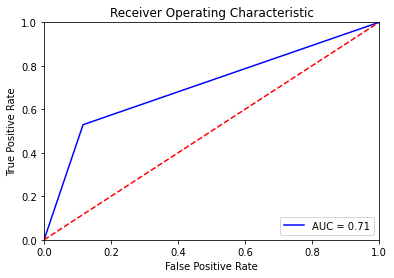

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = Classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
# # method II: ggplot
# !pip install ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

you might came accross some error while running the above cell , if so then follow these two steps

*   Fix some config in util.py : 

pd.tslib.Timestamp --> pd.Timestamp
then ctrl-s to save new configuration

*   Fix some config in smoothers.py :

from pandas.lib import Timestamp --> from pandas import Timestamp
then ctrl-s to save new configuration after fix all above. Run this cell again.

#### Feature Importances

The feature importances in a random forest indicate the sum of the reduction in Gini Impurity over all the nodes that are split on that feature. We can use these to try and figure out what predictor variables the random forest considers most important. The feature importances can be extracted from a trained random forest and put into a Pandas dataframe as follows:


In [ ]:
import pandas as pd
features = df.drop(['class'],axis=1)
print(features.columns)
# Extract feature importances
fi = pd.DataFrame({'feature': list(features.columns),
                   'importance': Classifier.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')


,feature,importance
1,plas,0.205622
5,mass,0.175328
6,pedi,0.143427
7,age,0.134587
2,pres,0.093163


Feature importances can give us insight into a problem by telling us what variables are the most discerning between classes. For example, here `plas`, indicating `Plasma glucose concentration a 2 hours in an oral glucose tolerance test`, is the most important feature which makes sense in the problem context.

Feature importances can be used for feature engineering by building additional features from the most important. We can also use feature importances for feature selection by removing low importance features.

#### Visualize Tree in Forest

Finally, we can visualize a single decision tree in the forest. This time, we have to limit the depth of the tree otherwise it will be too large to be converted into an image. To make the figure below, I limited the maximum depth to 6. This still results in a large tree that we can’t completely parse!

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=4)
dt= dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

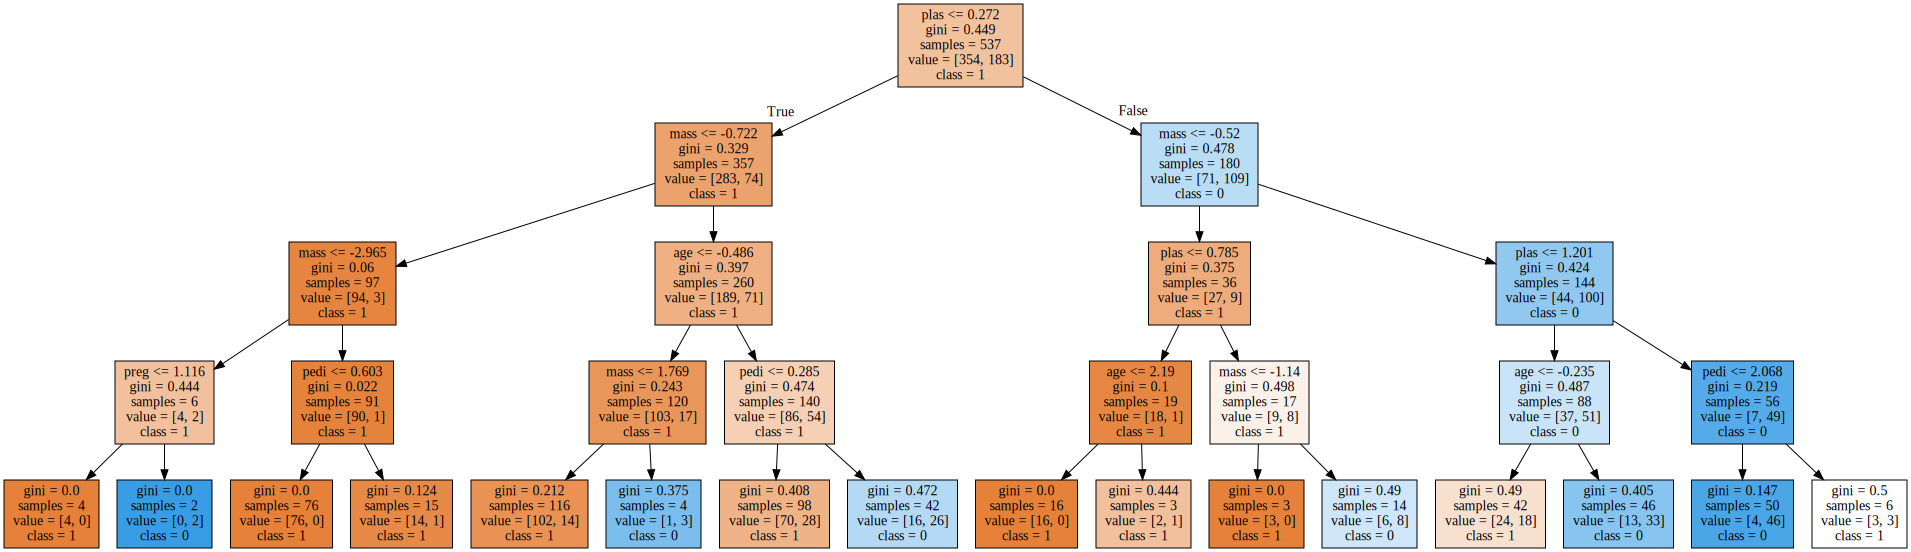

In [ ]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(
    tree.export_graphviz(
        dt,
        out_file=None,
        feature_names=features.columns,
        class_names=['1' , '0'],
        filled = True)
)
display(SVG(graph.pipe(format='svg')))

### **Classification Using Random Forest After Feature Selection**

#### 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np


#### 2. Importing Dataset

In [ ]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['pregnancies', 'glucose', 'BP', 'skin-thick', 'insulin', 'BMI', 'pedi', 'age', 'class']
names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 3. Preparing Data For Training

In [ ]:
# To numpy for fast computation
array = df.values
X = array[:,0:8]
Y = array[:,8]

#### 4. Feature Selection

Feature selection Using Filter Methods



what are filter methods ?

![text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png)
Filter methods select features from a dataset independently for any machine learning algorithm.
These methods rely only on the characteristics of these variables, so features are filtered out of 
the data before learning begins.These methods are powerful and simple and help to quickly 
remove features— and they are generally the first step in any feature selection pipeline.

Ex :- Chi-squared Test, ANOVA-F test, Pearson Correlation

**We'll be using ----> CHI-SQUARED test**

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4) # we want to select top 4 features
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


No handles with labels found to put in legend.


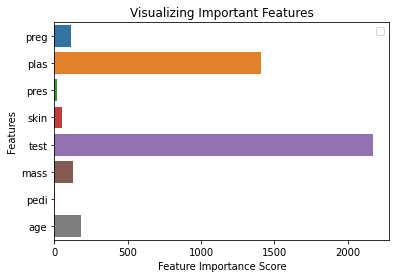

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=fit.scores_, y=names)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Those with highest Scores Have Been choosen

So We'll Choose  

Plas,Test,Mass and Age  as our **top4** features

Now our Dataset Looks like below :-

In [ ]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:]) # Top 5 Rows of Dataset after Chi-squared Test

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [ ]:
print(features.shape) # Our new Independent variables
print(Y.shape) # Our dependent variables

(768, 4)
(768,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.3, random_state=1) # 70% training and 30% test

#### 5. Feature Scaling

We know our dataset is not yet a scaled value.To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 6. Training the Algorithm

Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this Classification problem. Execute the following code:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators=20, random_state=0)
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

The RandomForestClassifier class of the sklearn.ensemble library is used to solve Classification problems via random forest. The most important parameter of the RandomForestClassifier class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs. You can find details for all of the parameters of RandomForestClassifier [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

#### 7. Evaluating the Algorithm

For classification problems the metrics used to evaluate an algorithm are accuracy, confusion matrix, precision recall, and F1 values. Execute the following script to find these values:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[129  17]
 [ 35  50]]
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       146
         1.0       0.75      0.59      0.66        85

    accuracy                           0.77       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

0.7748917748917749


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test,y_pred)

In [ ]:
roc_value

0.7358984689766318

Let's Compare the Random Forest with Decision Tree

#### Decision Tree

In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7186147186147186


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value_DT = roc_auc_score(y_test,y_pred1)

In [ ]:
roc_value_DT


0.7065672844480257

*We can clearly see that Random Forests are performing better then decision Tree.*

# **`Random Forest Regressor`**

In this section we will study how random forests can be used to solve regression problems using Scikit-Learn.

### **Problem Definition**

The problem here is to predict the insurance charges.

### **Solution**

To solve this regression problem we will use the random forest algorithm via the Scikit-Learn Python library. We will follow the traditional machine learning pipeline to solve this problem. Follow these steps:

#### 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

#### 2. Importing Dataset

In [ ]:
df=pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3. Preparing Data For Training

Two tasks will be performed in this section. The first task is to change the categorical data to numerical, secondly the resultant data is then divided into training and test sets.

In [ ]:
encoded_data = pd.get_dummies(df, columns=["sex","smoker","region"])
encoded_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# # To numpy for fast computation
Y = encoded_data['charges'].to_numpy()
X=encoded_data.drop(['charges'],axis=1).to_numpy()

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

#### 4. Feature Scaling

We know our dataset is not yet a scaled value,to do so, we will use Scikit-Learn's StandardScaler class

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 5. Training the Algorithm
Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs. You can find details for all of the parameters of RandomForestRegressor [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In case of regression we used the RandomForestRegressor class of the sklearn.ensemble library.

#### 6. Evaluating our Model

The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error.

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2749.0516301805965
Mean Squared Error: 24454131.015163943
Root Mean Squared Error: 4945.111830400193


If the number of estimators is changed to 200, the results are as follows:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2743.6153022110957
Mean Squared Error: 23571535.422954805
Root Mean Squared Error: 4855.052566446094


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

features = encoded_data.drop(['charges'],axis=1)
m = list(features.columns)
print(len(features.columns),type(features.columns))

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = m, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

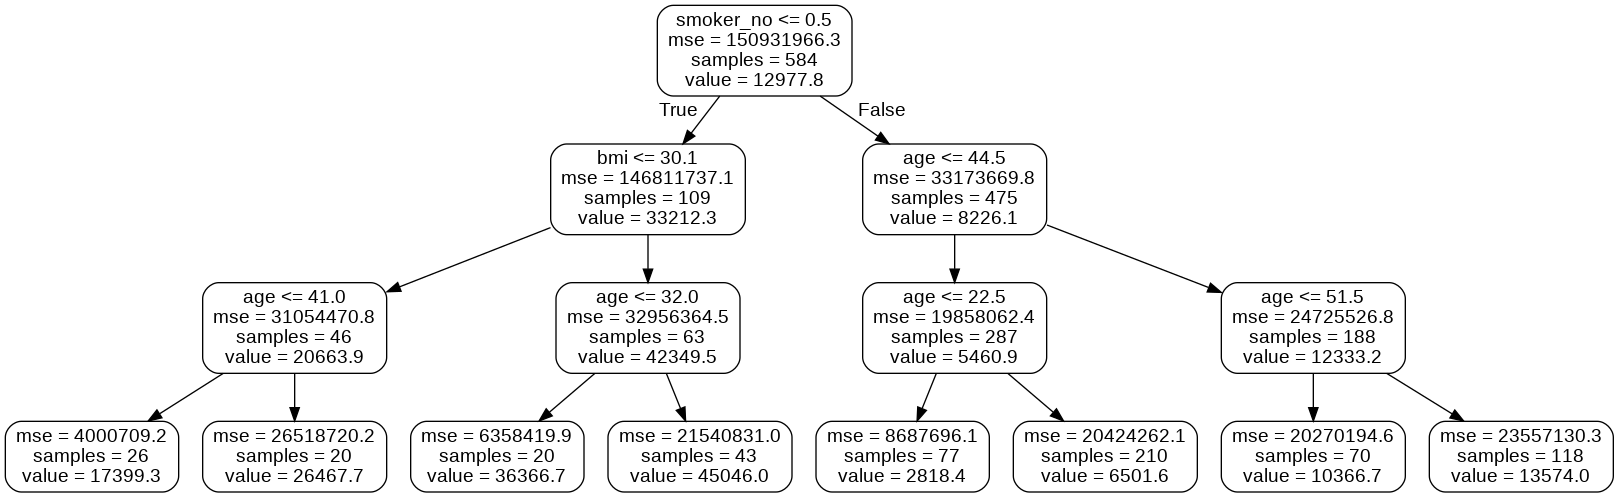

In [ ]:
from IPython.display import display
from PIL import Image
img_PIL = Image.open(r'small_tree.png')
display(img_PIL)

## **Feature selection for Regression**

In [ ]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(estimator=regressor,n_features_to_select= 8)
fit = rfe.fit(X, Y)

In [ ]:
features = fit.transform(X)
features[:,:8]

array([[19.  , 27.9 ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  1.  ]])

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:

regressor1 = RandomForestRegressor(n_estimators=200, random_state=0)
regressor1.fit(X_train, y_train)
y_pred = regressor1.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2715.0345044641676
Mean Squared Error: 23974045.744367912
Root Mean Squared Error: 4896.329823895436
